In [ ]:
import os
import yaml
import tqdm
import time
import pandas as pd
import numpy as np
import sys
import itertools
from collections import defaultdict
sys.path.append("./src/")
from preprocess.imdb_reviews import PreprocessIMDB

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

### Random

In [1]:
!python src/main.py --config_path "D:\Learning\NLP\Projects\scratch_nlp\configs\bow.yaml" --algo "BOW" --log_folder "D:\Learning\NLP\Projects\scratch_nlp\output\bow"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shanmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Traceback (most recent call last):
  File "d:\Learning\NLP\Projects\scratch_nlp\src\main.py", line 62, in <module>
    main()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\main.py", line 58, in main
    algo.run()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 16, in run
    self.fit_transform()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 30, in fit_transform
    self.fit(text_ls, y)
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 23, in fit
    for text in text_ls:
TypeError: 'NoneType' object is not iterable


In [1]:
import pandas as pd

dict_ = {
    "A": 2,
    "B": 4
}
df = pd.DataFrame(dict_, index=[0]).T
df

,0
A,2
B,4


In [36]:
import numpy as np

arr = np.load("./output/bow/Text Vector.npy")
arr.shape

(600, 9834)

In [4]:
import os

x = os.environ['PATH']
x.split(";")

['e:\\anaconda\\envs\\nlp_env',
 'C:\\Program Files\\dotnet\\',
 'C:\\Program Files\\Git\\cmd',
 'E:\\anaconda\\Scripts',
 'E:\\anaconda\\Library',
 'E:\\anaconda\\Library\\bin',
 'E:\\anaconda\\Library\\mingw-w64\\bin',
 'C:\\Users\\shanmukh\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts\\',
 'C:\\Users\\shanmukh\\AppData\\Local\\Programs\\Python\\Python38-32\\',
 'C:\\Users\\shanmukh\\AppData\\Local\\Microsoft\\WindowsApps',
 'C:\\Users\\shanmukh\\AppData\\Local\\GitHubDesktop\\bin',
 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin',
 'C:\\Users\\shanmukh\\AppData\\Local\\Microsoft\\WindowsApps',
 'D:\\heroku\\bin',
 'E:\\vscode\\Microsoft VS Code\\bin',
 'E:\\PyCharm\\PyCharm Community Edition 2021.2.3\\bin',
 '',
 'E:\\anaconda',
 'E:\\anaconda\\Library\\bin',
 'E:\\anaconda\\Library\\bin',
 'E:\\apache-jena-4.7.0\\bat',
 'C:\\Program Files\\Java\\jdk-19\\bin',
 'C:\\Program Files\\Common Files\\Oracle\\Java\\javapath',
 'C:\\Users\\shanmukh\

In [27]:
import pandas as pd

df = pd.read_csv(r"D:\Learning\NLP\Projects\scratch_nlp\output\ngram\Vocab Frequency.csv")
df.head()

,Word,Frequency
0,better whatev person love one,1
1,gate treasur hunter oh excus,1
2,atmospher place jump scare also,1
3,deliv like joke either riley,1
4,forsaken desert giant forest full,1


In [28]:
df.sort_values(by="Frequency", ascending=False, ignore_index=True, inplace=True)
df.head()

,Word,Frequency
0,el día de la bestia,2
1,anoth episod like one brak,2
2,atmospher place jump scare also,1
3,deliv like joke either riley,1
4,forsaken desert giant forest full,1


In [30]:
n = 5
word_cols = [f"Word_{i+1}" for i in range(n)]
print(word_cols)

df[word_cols] = df["Word"].str.split(" ", expand=True)
df.head()

['Word_1', 'Word_2', 'Word_3', 'Word_4', 'Word_5']


,Word,Frequency,Word_1,Word_2,Word_3,Word_4,Word_5
0,el día de la bestia,2,el,día,de,la,bestia
1,anoth episod like one brak,2,anoth,episod,like,one,brak
2,atmospher place jump scare also,1,atmospher,place,jump,scare,also
3,deliv like joke either riley,1,deliv,like,joke,either,riley
4,forsaken desert giant forest full,1,forsaken,desert,giant,forest,full


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

new_df = df.iloc[:10]

def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l.iloc[i]
        res.append(s / sum(l))
    return res

cmap = plt.get_cmap("rainbow")

for i, col in enumerate(word_cols):
    radius=i+2
    width=1
    frame = new_df.groupby(word_cols[:i+1])["Frequency"].sum()
    colors = cmap(percentage_growth(frame))
    labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.to_numpy()]
    plt.pie(frame, labels=labels, colors=colors, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), textprops=dict(size=20), labeldistance=0.8 + i/60)    

In [ ]:
import nltk
nltk.download("treebank")
data = list(nltk.corpus.treebank.tagged_sents())
data

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

arr_df = pd.read_csv("./output/hmm/Emission Matrix.csv")
cols = list(arr_df.columns)
vocab = cols[1:]
pos = list(arr_df[cols[0]])

tsne = TSNE(n_components=2)
arr_tsne = tsne.fit_transform(np.array(arr_df[vocab]))

fig = px.scatter(x=arr_tsne[:,0], y=arr_tsne[:,1],text=pos)
fig.update_traces(textposition="bottom right")

In [6]:
arr_df.head()

,Unnamed: 0,appeal,off,62.1,blow,President,damn,professor,adds,Community,...,Otero,require,paltry,impede,Primerica,electric,lease,Fees,endless,physical
0,NNPS,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RB,0.0,0.001335,0.0,0.0,0.0,0.00089,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,VBD,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RP,0.0,0.110429,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,JJR,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import numpy as np

arr = np.array([2,1,3,4])
np.unique(arr, return_counts=True)

(array([1, 2, 3, 4]), array([1, 1, 1, 1]))

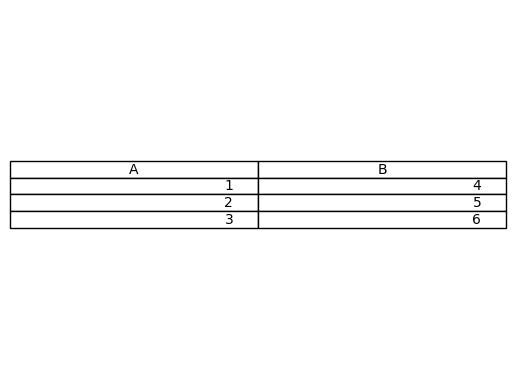

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Create a figure and axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Adjust layout
table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the plot
plt.show()

### Word2Vec

In [64]:
config_path = "./configs/word2vec.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow = CBOWDataset(config_dict)
l_cxt, r_cxt, l_lbl, r_lbl = cbow.make_pairs()

print(cbow.vocab_freq)
print(l_cxt)
print(r_cxt)
print(l_lbl)
print(r_lbl)

train_left_loader, train_right_loader, val_left_loader, val_right_loader = create_dataloader(l_cxt, r_cxt, l_lbl, r_lbl, 0.2, 8, 2023)

# for batch in iter(train_left_loader):
#     l_c, l_l = batch
#     print(l_c)
#     print(l_l)
#     break

# for batch in iter(train_right_loader):
#     r_c, r_l = batch
#     print(r_c)
#     print(r_l)
#     break

Extracting from: unsup: 100%|██████████| 5/5 [00:00<00:00, 26.67it/s]

{'br': 56, 'movi': 34, 'film': 30, 'tom': 13, 'time': 12, 'like': 12, 'end': 12, 'charact': 12, 'one': 11, 'seen': 10, 'much': 10, 'go': 10, 'see': 9, 'back': 9, 'know': 9, 'well': 8, 'good': 8, 'think': 8, 'great': 8, 'hous': 7, 'come': 7, 'get': 7, 'cecilia': 7, 'goe': 6, 'hope': 6, 'cut': 6, 'look': 6, 'play': 6, 'two': 6, 'littl': 6, '<UNK>': 1287}
[[30, 1], [30, 4], [1, 30], [1, 30], [1, 30], [4, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 23], [30, 30], [30, 30], [30, 30], [30, 30], [23, 30], [30, 24], [30, 30], [30, 30], [30, 30], [24, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 1], [30, 30], [1, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 30], [30, 10], [30, 30], [30, 30], [30, 30], [1

In [65]:
model = CBOWModel(config_dict)

train_loader = (train_left_loader, train_right_loader)
val_loader = (val_left_loader, val_right_loader)
optim = torch.optim.Adam(model.parameters(), lr=config_dict["train"]["lr"])
history = fit_model(model, optim, train_loader, val_loader, config_dict)

-----------Epoch 1/10-----------


Validation: 100%|██████████| 51/51 [00:19<00:00,  2.56it/s]


Train Loss : 5.19072961807251 - Val Loss : 2.880483865737915
Validation Loss improved from inf to 2.880483865737915
-----------Epoch 2/10-----------


Validation: 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]


Train Loss : 2.8874399662017822 - Val Loss : 2.194394826889038
Validation Loss improved from 2.880483865737915 to 2.194394826889038
-----------Epoch 3/10-----------


Validation: 100%|██████████| 51/51 [00:17<00:00,  2.95it/s]


Train Loss : 2.2812020778656006 - Val Loss : 1.9462478160858154
Validation Loss improved from 2.194394826889038 to 1.9462478160858154
-----------Epoch 4/10-----------


Validation: 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


Train Loss : 1.9103882312774658 - Val Loss : 1.7780832052230835
Validation Loss improved from 1.9462478160858154 to 1.7780832052230835
-----------Epoch 5/10-----------


Validation: 100%|██████████| 51/51 [00:15<00:00,  3.28it/s]


Train Loss : 1.6663691997528076 - Val Loss : 1.6299480199813843
Validation Loss improved from 1.7780832052230835 to 1.6299480199813843
-----------Epoch 6/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.46it/s]


Train Loss : 1.4816888570785522 - Val Loss : 1.539669156074524
Validation Loss improved from 1.6299480199813843 to 1.539669156074524
-----------Epoch 7/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.44it/s]


Train Loss : 1.3658875226974487 - Val Loss : 1.4765939712524414
Validation Loss improved from 1.539669156074524 to 1.4765939712524414
-----------Epoch 8/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.60it/s]


Train Loss : 1.2907533645629883 - Val Loss : 1.4481770992279053
Validation Loss improved from 1.4765939712524414 to 1.4481770992279053
-----------Epoch 9/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.52it/s]


Train Loss : 1.2339324951171875 - Val Loss : 1.4516034126281738
Validation loss didn't improve from 1.4481770992279053
-----------Epoch 10/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.47it/s]


Train Loss : 1.1893771886825562 - Val Loss : 1.4282432794570923
Validation Loss improved from 1.4481770992279053 to 1.4282432794570923
Training completed in 0h 5m 55s
Best Val RMSE: 1.4282432794570923


In [84]:
from sklearn.manifold import TSNE
import plotly.express as px

model.load_state_dict(torch.load("./output/word2vec/best_model.pt", weights_only=True))

embeds = model.cxt_embedding.weight.detach().numpy()
vocab = list(cbow.vocab_freq.keys())

tsne = TSNE(n_components=3)
embeds_tsne = tsne.fit_transform(embeds)

tsne_df = pd.DataFrame.from_dict({
    "X": embeds_tsne[:, 0],
    "Y": embeds_tsne[:, 1],
    "Z": embeds_tsne[:, 2], 
    "Word": vocab
})
px.scatter_3d(tsne_df, x="X", y="Y", z="Z", text="Word")

e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 947, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 1416, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [ ]:
vocab_dict = {0: 4, 1: 6, 2: 3, 3: 2, 4: 2}

tree = HuffmanBTree(vocab_dict)
print(tree.word_code)
print(tree.word_path)
print(tree.left_dict)
print(tree.right_dict)

# {1: [1, 1], 0: [1, 0], 3: [0, 1, 1], 4: [0, 1, 0], 2: [0, 0]}
# {1: [8, 7], 0: [8, 7], 3: [8, 6, 5], 4: [8, 6, 5], 2: [8, 6]}
# ([[8], [8, 7], [], [6, 5], [6]], [[7], [], [8, 6], [8], [8, 5]])

In [ ]:
freq_df = pd.read_csv("./output/bow/Vocab Frequency.csv")
freq_df.sort_values(by="Frequency", ascending=False, ignore_index=True, inplace=True)
freq_df = freq_df.iloc[:1000]
num_vocab = 5
freq_df = freq_df.iloc[np.random.choice(len(freq_df), num_vocab)]

vocab = list(freq_df["Word"])
freq = list(freq_df["Frequency"])
vocab_idx = [i for i in range(len(vocab))]
vocab_dict = {k:v for k,v in zip(vocab_idx, freq)}

freq_df.head(num_vocab)

In [104]:
class Word:
    def __init__(self, word, freq):
        self.word = word
        self.freq = freq

class Tree:
    def __init__(self, word, freq, left, right):
        self.word = word
        self.freq = freq
        self.right = right
        self.left = left

def construct_tree(vocab, freq):
    word_list = []
    for w,f in zip(vocab, freq):
        word_list.append(Word(w,f))

    count = 0
    while len(word_list) > 1:
        left = word_list[-1]
        right = word_list[-2]

        word = f"W{count}"
        freq = left.freq + right.freq

        print(f"Root: ({word}, {freq}), Left: ({left.word}, {left.freq}), Right: ({right.word}, {right.freq})")

        tree = Tree(word, freq, left, right)
        word_list = word_list[:-2]
        
        word_list.append(tree)
        word_list = sorted(word_list, key=lambda a:a.freq, reverse=False)

        count += 1

    return tree

def encode_tree(tree, path_dict, path):

    if isinstance(tree, Word):
        path_dict[tree.word] = path
    
    if isinstance(tree.left, Word):
        path_dict[tree.left.word] = path + [0]
    else:
        encode_tree(tree.left, path_dict, path+[0])

    if isinstance(tree.right, Word):
        path_dict[tree.right.word] = path + [1]
    else:
        encode_tree(tree.right, path_dict, path+[1])

    if len(path_dict) == num_vocab:
        return path_dict

In [ ]:
tree = construct_tree(vocab, freq)

path_dict = {}
path = []
path_dict = encode_tree(tree, path_dict, path)
path_dict

### GloVe

In [1]:
import numpy as np
import yaml
import os
import sys
sys.path.append("./src/")
from src.core.word2vec.dataset import CBOWDataset

from collections import defaultdict
import tqdm
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [2]:
config_path = "./configs/glove.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow_ds = CBOWDataset(config_dict)

text_ls = cbow_ds.text_ls
word2id = cbow_ds.word2id
id2word = cbow_ds.id2word
num_vocab = len(word2id)
context = config_dict["dataset"]["context"]

val_split = config_dict["dataset"]["val_split"]
batch_size = config_dict["dataset"]["batch_size"]
seed = config_dict["dataset"]["batch_size"]

xmax = config_dict["train"]["x_max"]
alpha = config_dict["train"]["alpha"]

Extracting from: unsup: 100%|██████████| 5/5 [00:00<00:00, 107.52it/s]


Validation: 100%|██████████| 31/31 [00:03<00:00,  8.71it/s]
e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 947, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 1416, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

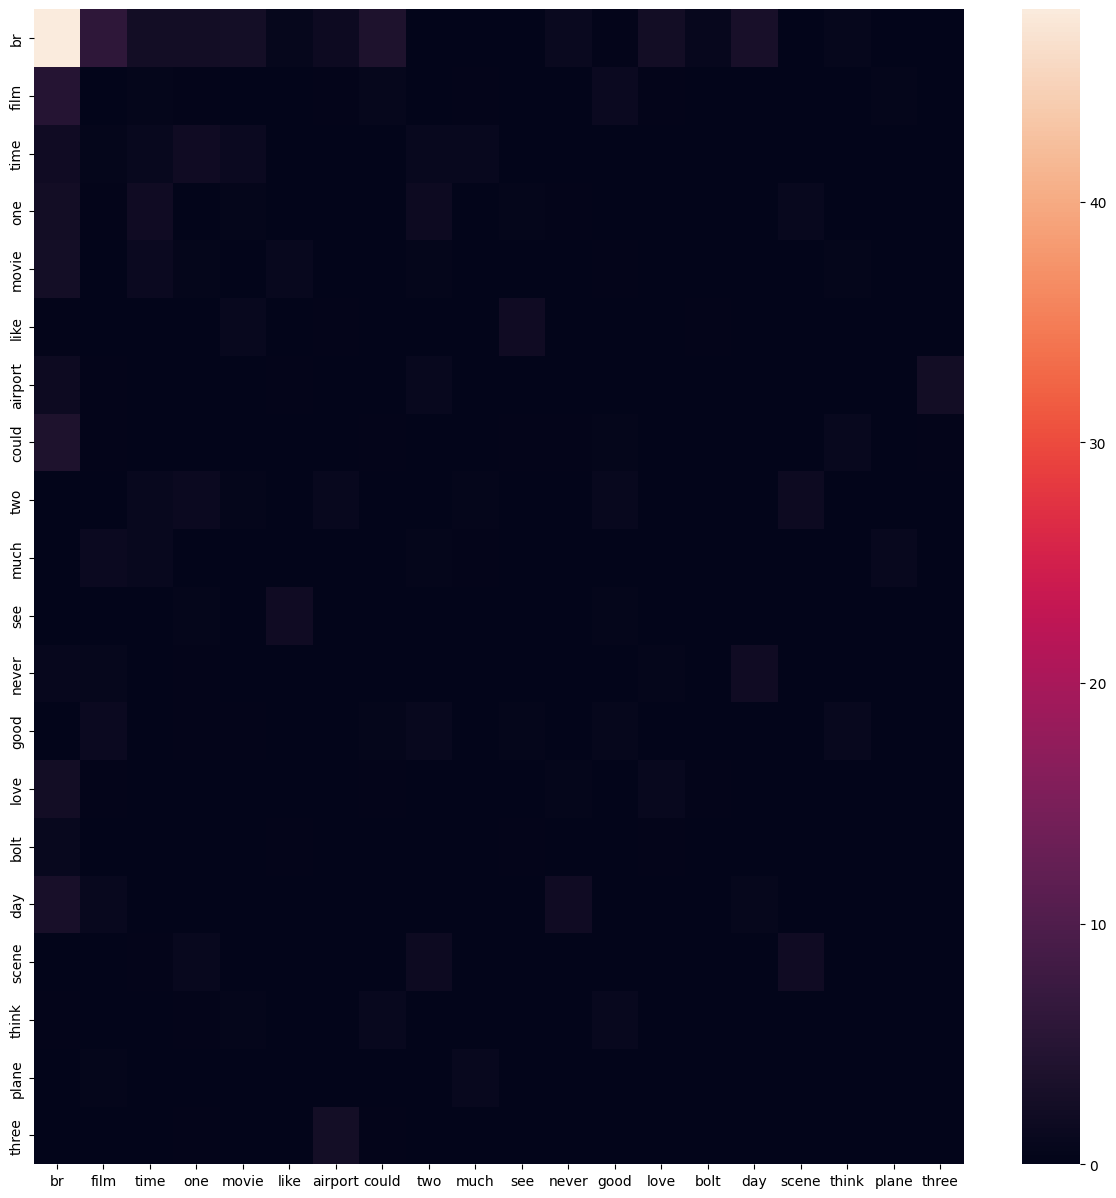

In [3]:
from core.glove.glove import GloVe

glove_model = GloVe(config_dict)
glove_model.run()

In [9]:
glove_model.glove_ds.word2id.keys()

dict_keys(['br', 'film', 'time', 'one', 'movie', 'like', 'airport', 'could', 'two', 'much', 'see', 'never', 'good', 'love', 'bolt', 'day', 'scene', 'think', 'plane', 'three', 'little', 'scenes', 'cagney', 'great', 'seen', 'plot', 'many', 'acting', 'oscar', 'people', 'brooks', 'even', 'make', 'future', '77', 'air', 'help', 'films', 'made', 'well', 'high', 'chasers', 'etting', 'story', 'man', 'audience', 'making', 'dialogue', 'would', 'better', 'stars', 'rich', 'james', 'also', 'right', 'disaster', 'say', 'far', 'best', 'maybe', 'either', 'something', 'look', 'cut', 'looks', 'leading', 'actors', 'watch', 'take', 'movies', 'life', 'without', 'allen', 'characters', 'bromwell', 'teachers', 'years', 'lead', 'homeless', 'streets', 'bet', 'mel', 'warren', 'opening', 'comedy', 'new', '747', 'valuable', 'takes', 'different', 'second', 'classic', 'although', 'actually', 'liked', 'character', 'dull', 'minutes', 'george', 'back', '<UNK>'])

In [13]:
from preprocess.utils import preprocess_text

operations = config_dict["preprocess"]["operations"]
sentence = preprocess_text(text_ls[0], operations)
word_ls = sentence.split()
vocab = glove_model.glove_ds.word2id.keys()
word_ls = [i if i in vocab else "<UNK>" for i in word_ls]
word_ids = [glove_model.glove_ds.word2id[word] for word in word_ls]
word_ids = torch.Tensor(word_ids).to(torch.long)
word_embeds = glove_model.model.ctr_embedding(word_ids)
word_embeds.shape

torch.Size([63, 128])

In [28]:
cooccur_mat = np.zeros((num_vocab, num_vocab))

for text in text_ls:
    words = text.split()

    if len(words) < 1 + context:
        continue

    for i in range(context, len(words)-context):
        id_i = word2id[words[i]]
        for j in range(i-context, i+context):
            id_j = word2id[words[j]]
            dist = np.abs(j-i)
            if dist != 0: cooccur_mat[id_i][id_j] += 1/dist

X_ctr, X_cxt = np.indices((num_vocab, num_vocab))
X_ctr, X_cxt = X_ctr.flatten(), X_cxt.flatten()
X_count = cooccur_mat.flatten()
# fig, ax = plt.subplots(1, 1, figsize=(15,15))
# sns.heatmap(cooccur_mat, xticklabels=word2id.keys(), yticklabels=word2id.keys(), ax=ax)

In [ ]:
# glove_model = GloVeModel(config_dict)
# optim = torch.optim.Adam(glove_model.parameters(), lr=config_dict["train"]["lr"])

# glove_trainer = GloVeTrainer(glove_model, optim, config_dict)
# glove_trainer.fit(train_loader, val_loader)

### RNN

In [44]:
import numpy as np
import yaml
import os
import sys
sys.path.append("./src/")
from preprocess.imdb_reviews import PreprocessIMDB
from src.core.word2vec.dataset import CBOWDataset

from collections import defaultdict
import tqdm
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Extracting from: unsup: 100%|██████████| 10/10 [00:00<00:00, 310.55it/s]


(array([0, 1, 2]), array([10, 10, 10]))


(array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.]),
 array([35.5, 35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36.4, 36.5]),
 <BarContainer object of 10 artists>)

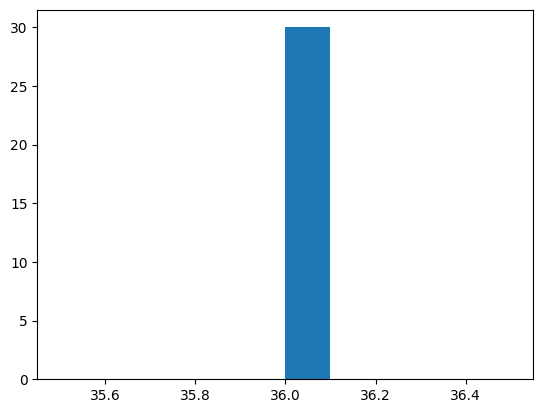

In [45]:
### Dataset
config_path = "./configs/rnn.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow_ds = CBOWDataset(config_dict)

text_ls = cbow_ds.text_ls
label_ls = np.array(cbow_ds.preproc_cls.label_ls)
le = LabelEncoder()
label_ls = le.fit_transform(label_ls)
word2id = cbow_ds.word2id
id2word = cbow_ds.id2word
num_vocab = len(word2id)

print(np.unique(label_ls, return_counts=True))

seq_len = min([len(i.split()) for i in text_ls]) 
config_dict["dataset"]["seq_len"] = seq_len

text_id_ls = []
for text in text_ls:
    ls = []
    for word in text.split()[:seq_len]:
        ls.append(word2id[word])
    text_id_ls.append(ls)

text_id_ls, label_ls = np.array(text_id_ls), np.array(label_ls)

In [46]:
### Data Loader

val_split = config_dict["dataset"]["val_split"]
batch_size = config_dict["dataset"]["batch_size"]
seed = config_dict["dataset"]["batch_size"]

def create_dataloader(X, y, val_split, batch_size, seed):
    train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=val_split, random_state=seed)

    train_ds = TensorDataset(torch.Tensor(train_x), torch.Tensor(train_y))
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=1, pin_memory=True)

    val_ds = TensorDataset(torch.Tensor(val_x), torch.Tensor(val_y))
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=1, pin_memory=True)
    return train_loader, val_loader

train_loader, val_loader = create_dataloader(text_id_ls, label_ls, val_split, batch_size, seed)

X, y = next(iter(train_loader))
print(X)
print(y)

tensor([[100., 100., 100., 100.,  63., 100., 100., 100.,  52., 100., 100., 100.,
           9.,   5., 100.,  55., 100., 100., 100.,  46.,   1., 100., 100.,   7.,
         100., 100., 100., 100., 100., 100., 100., 100., 100.,   2., 100.,  47.],
        [100., 100., 100.,   0.,   0.,   2., 100., 100.,  33.,  23.,   8., 100.,
         100., 100., 100.,  26.,  39., 100.,  11.,   3., 100., 100.,   8.,  98.,
         100., 100., 100., 100., 100., 100.,  11.,   3., 100.,  95., 100., 100.],
        [100., 100.,  81.,   1.,   9.,  46., 100.,  74.,  94.,  49., 100., 100.,
         100., 100.,  33.,   6., 100., 100., 100., 100.,  13., 100., 100.,  34.,
          13., 100.,  70.,  31., 100., 100., 100., 100.,  27.,  51.,   7., 100.],
        [100.,  20., 100.,  32., 100.,  60., 100., 100., 100., 100., 100.,   2.,
         100., 100.,  19.,   7., 100., 100., 100., 100., 100., 100., 100., 100.,
           0.,   0., 100.,   2., 100., 100., 100., 100., 100., 100., 100., 100.],
        [100., 100., 100

In [49]:
### RNN Cell

class RNNCell(nn.Module):
    def __init__(self, h_dim, inp_x_dim, out_x_dim):
        super(RNNCell, self).__init__()
        
        self.hh_dense = nn.Linear(h_dim, h_dim)
        self.hx_dense = nn.Linear(inp_x_dim, h_dim)

        self.xh_dense = nn.Linear(h_dim, out_x_dim)

    def forward(self, ht_1, xt):
        ht = nn.Tanh()(self.hh_dense(ht_1) + self.hx_dense(xt))
        yt = self.xh_dense(ht)
        return ht, yt

class RNNModel(nn.Module):
    def __init__(self, config_dict):
        super(RNNModel, self).__init__()

        self.seq_len = config_dict["dataset"]["seq_len"]
        self.num_layers = config_dict["model"]["num_layers"]
        self.h_dims = config_dict["model"]["h_dim"]
        self.x_dims = config_dict["model"]["x_dim"]
        self.clf_dims = config_dict["model"]["clf_dim"]
        self.num_classes = config_dict["dataset"]["num_classes"]

        num_vocab = 1 + config_dict["dataset"]["num_vocab"]
        embed_dim = config_dict["model"]["embed_dim"]
        self.embed_layer = nn.Embedding(num_vocab, embed_dim)

        self.rnn_cells = []
        for i in range(self.num_layers):
            h_dim = self.h_dims[i]
            inp_x_dim, out_x_dim = self.x_dims[i], self.x_dims[i+1]
            self.rnn_cells.append(RNNCell(h_dim, inp_x_dim, out_x_dim))

    def forward(self, X):
        x_embed = self.embed_layer(X.to(torch.long))
        num_samples = x_embed.size(0)
        
        yt_1s = x_embed
        for i in range(self.num_layers):
            yts = []
            rnn_cell = self.rnn_cells[i]

            ht = torch.randn((num_samples, self.h_dims[i]))
            for j in range(self.seq_len):
                ht, yt = rnn_cell(ht, yt_1s[:, j, :])
                yts.append(yt)

            yt_1s = torch.transpose(torch.stack(yts), 0, 1)

        out = yt_1s[:, -1, :]
        for i in range(len(self.clf_dims)-1):
            out = nn.Linear(self.clf_dims[i], self.clf_dims[i+1])(out)
            out = nn.ReLU()(out)

        out = nn.Linear(self.clf_dims[-1], self.num_classes)(out)
        out = nn.Softmax()(out)

        return out

In [50]:
rnn_model = RNNModel(config_dict)
out = rnn_model(X)
out

e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.4922, 0.5078],
        [0.4919, 0.5081],
        [0.4895, 0.5105],
        [0.4909, 0.5091],
        [0.4909, 0.5091],
        [0.4909, 0.5091],
        [0.4909, 0.5091],
        [0.4902, 0.5098]], grad_fn=<SoftmaxBackward0>)